# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single DataFrame
mouse_studies = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_studies.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice =mouse_studies["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_studies[mouse_studies.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mice = mouse_studies[mouse_studies["Mouse ID"].isin(duplicate_mice["Mouse ID"])]
all_data_for_duplicate_mice.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_studies = mouse_studies[~((mouse_studies["Mouse ID"] == "g989") & (mouse_studies["Timepoint"].duplicated()))]
cleaned_mouse_studies.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_studies =cleaned_mouse_studies["Mouse ID"].nunique()
cleaned_mice_studies

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_studies.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
)

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'Mean': 'Mean Tumor Volume',
    'Median': 'Median Tumor Volume',
    'Variance': 'Tumor Volume Variance',
    'Std_Deviation': 'Tumor Volume Std. Dev.',
    'SEM': 'Tumor Volume Std. Err.'
})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.reset_index()
summary_stats = summary_stats.set_index('Drug Regimen')
summary_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_studies.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean=np.mean,
    Median=np.median,
    Variance=np.var,
    Std_Deviation=np.std,
    SEM=st.sem
)
summary_stats.head()

,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

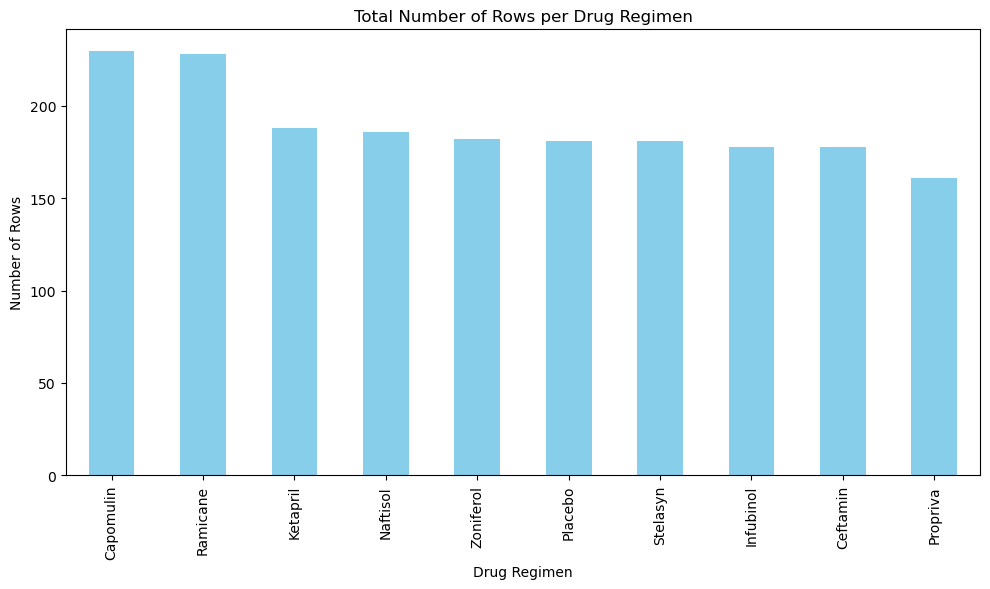

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_studies['Drug Regimen'].value_counts()
# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')

# Display the plot
plt.tight_layout()
plt.show()

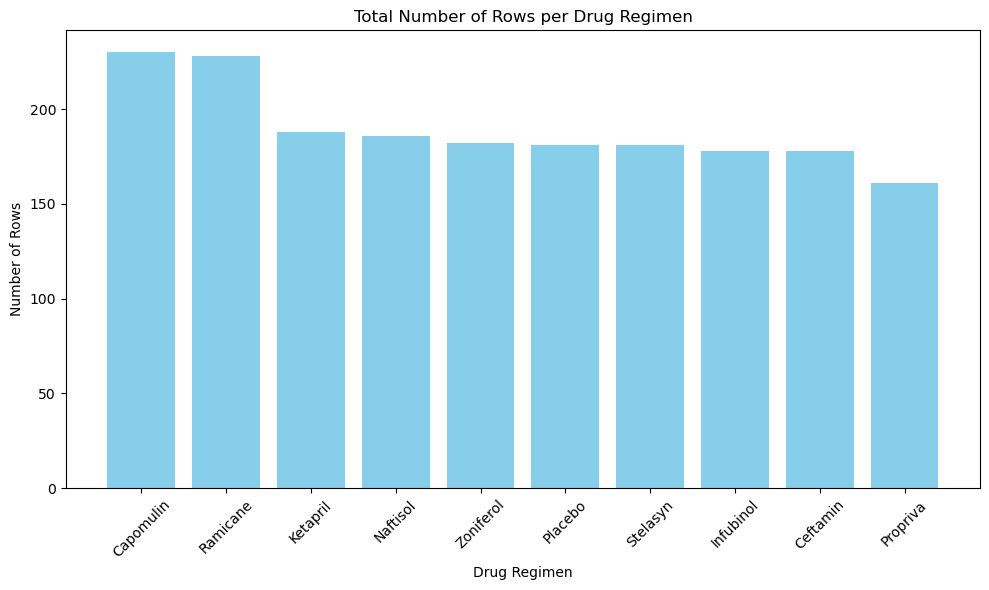

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = mouse_studies['Drug Regimen'].value_counts()

# Extract the regimen names and corresponding counts
regimen_names = regimen_counts.index
row_counts = regimen_counts.values

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, row_counts, color='skyblue')

# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

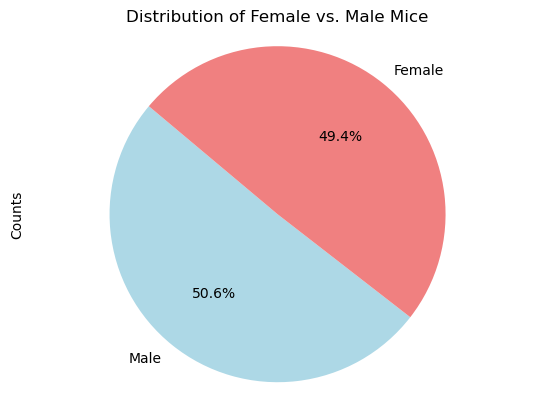

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Assuming you have a DataFrame called 'mouse_studies' with a 'Sex' column
gender_counts = mouse_studies['Sex'].value_counts()

# Create a DataFrame to hold the counts and set the 'Sex' values as the index
gender_df = pd.DataFrame({'Counts': gender_counts})
gender_df.index.name = 'Sex'

# Generate a pie plot using Pandas
gender_df.plot(kind='pie', y='Counts', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140, legend=False)

# Add a title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

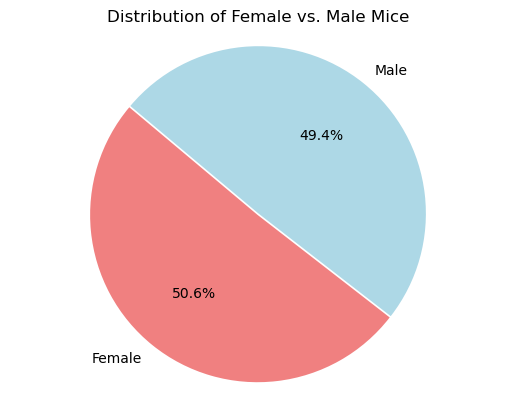

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Assuming you have a list or array with the gender counts, like [female_count, male_count]
gender_counts = mouse_studies['Sex'].value_counts()

# Labels for the two categories
labels = ['Female', 'Male']

# Colors for the pie chart sections
colors = ['lightcoral', 'lightblue']

# Explode a slice if needed (e.g., to emphasize one category)
explode = (0.01, 0)  # Explode the first slice (i.e., 'Female')

# Create the pie chart
plt.pie(gender_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = mouse_studies.groupby('Mouse ID')['Timepoint'].max().reset_index()

#Create a DataFrame for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = mouse_studies[mouse_studies['Drug Regimen'].isin(treatment_regimens)]

# Merge the filtered DataFrame with the last timepoint data
final_tumor_volume = pd.merge(filtered_data, last_timepoint, on=['Mouse ID', 'Timepoint'])
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [50]:

# Put treatments into a list for the for loop
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list for tumor volume data
tumor_volume_data = []

#  Calculate IQR and identify potential outliers
for regimen in treatment_regimens:
    # Filter data for the current regimen
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]
    
    # Get tumor volume data for the current regimen
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    
    # Append the data to the list for plotting
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate quartiles (Q1 and Q3) and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    potential_outliers = regimen_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print regimen name and potential outliers
    print(f"Regimen: {regimen}")
    print(f"Potential Outliers: {potential_outliers['Tumor Volume (mm3)'].values}\n")

Regimen: Capomulin
Potential Outliers: []

Regimen: Ramicane
Potential Outliers: []

Regimen: Infubinol
Potential Outliers: [36.3213458]

Regimen: Ceftamin
Potential Outliers: []



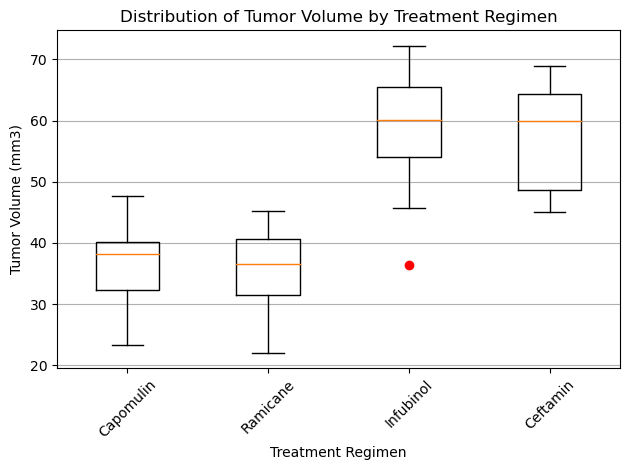

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of tumor volume data for each treatment group
data_to_plot = [tumor_volume_data[0], tumor_volume_data[1], tumor_volume_data[2], tumor_volume_data[3]]

# Create a figure and axis for the box plot
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(data_to_plot, labels=treatment_regimens, sym='r')  # sym='r' to show potential outliers as red diamonds

# Set labels and title
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume by Treatment Regimen')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')       # Add a horizontal grid for clarity
plt.tight_layout()

# Save or display the plot
plt.savefig("box_plot.png")  # Save the plot to a file
plt.show()                  # Display the plot

## Line and Scatter Plots

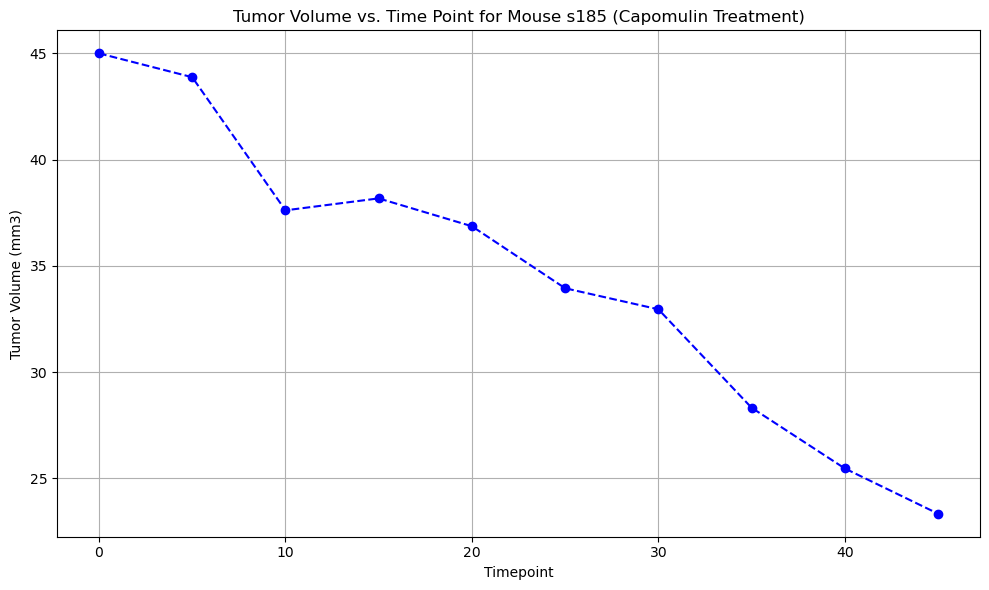

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "s185"

# Filter the data for the chosen mouse and Capomulin treatment
capomulin_data = mouse_studies[mouse_studies["Drug Regimen"] == "Capomulin"]
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='--', color='b')

# Set labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")

# Add grid lines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

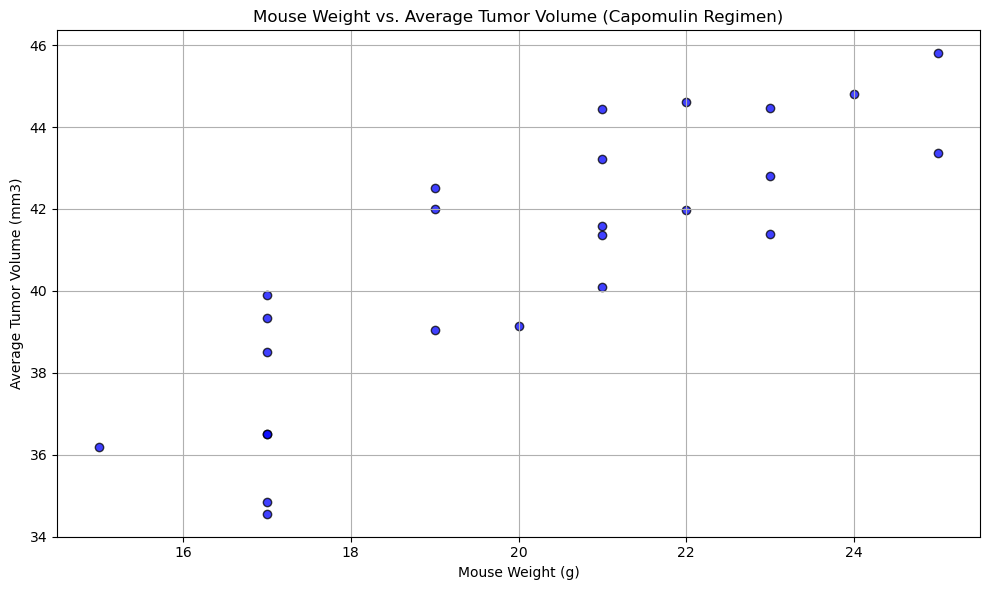

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = mouse_studies[mouse_studies["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Add grid lines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Correlation and Regression

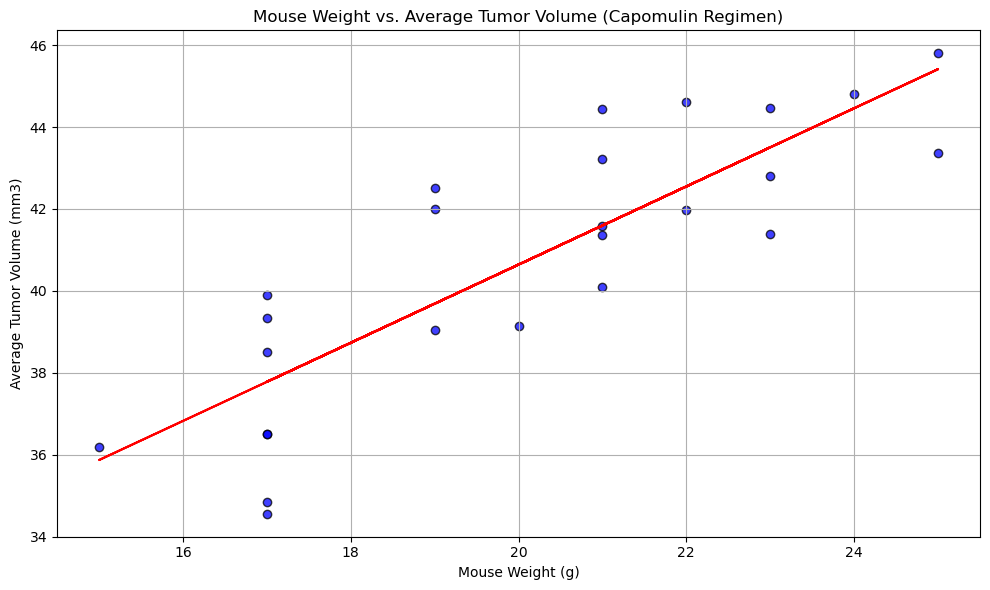

Correlation Coefficient: 0.8419363424694721


In [55]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = mouse_studies[mouse_studies["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept

# Plot the linear regression line
plt.plot(mouse_weight, regress_values, "r-")

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Add grid lines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation[0]}")